In [15]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd

# Validasi Dengan Pandas

In [16]:
from sklearn.datasets import load_iris

# Load dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

In [17]:
# Buat DataFrame
df = pd.DataFrame(data=X, columns=[f'feature_{i}' for i in range(X.shape[1])])
df['target'] = y

In [18]:
# rename dataframe column
df = df.rename(columns={'feature_0':'Sepal Length','feature_1':'Sepal Width','feature_2':'Petal Length','feature_3':'Petal Width'})

In [19]:
# untuk menampilkan 5 data teratas
print(df.head())

   Sepal Length  Sepal Width  Petal Length  Petal Width  target
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0
3           4.6          3.1           1.5          0.2       0
4           5.0          3.6           1.4          0.2       0


In [20]:
# untuk menampilkan informasi dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   target        150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
None


In [21]:
# untuk menampilkan statistik deskriptif dataset
print(df.describe())

       Sepal Length  Sepal Width  Petal Length  Petal Width      target
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.057333      3.758000     1.199333    1.000000
std        0.828066     0.435866      1.765298     0.762238    0.819232
min        4.300000     2.000000      1.000000     0.100000    0.000000
25%        5.100000     2.800000      1.600000     0.300000    0.000000
50%        5.800000     3.000000      4.350000     1.300000    1.000000
75%        6.400000     3.300000      5.100000     1.800000    2.000000
max        7.900000     4.400000      6.900000     2.500000    2.000000


In [22]:
# untuk menampilkan jumlah data null pada dataset
print(df.isnull().sum())

Sepal Length    0
Sepal Width     0
Petal Length    0
Petal Width     0
target          0
dtype: int64


# Visualisasi Data

## Jenis Visualisasi Data

1. Perbandingan (Comparison)

- Bar Chart
    - Deskripsi: Bar chart menunjukkan data dalam bentuk batang vertikal atau horizontal, di mana panjang batang mewakili nilai data.
    - Penggunaan: Cocok untuk membandingkan nilai antara kategori atau menunjukkan perubahan nilai dari waktu ke waktu.

- Line Chart
    - Deskripsi: Line chart menunjukkan data sebagai garis yang menghubungkan titik data. Digunakan untuk menyoroti tren atau perubahan sepanjang waktu.
    - Penggunaan: Ideal untuk melihat perubahan nilai seiring waktu atau mengidentifikasi pola tren.

- Combo Chart
    - Deskripsi: Combo chart menggabungkan dua jenis chart atau lebih dalam satu tampilan, seperti bar chart dan line chart.
    - Penggunaan: Berguna untuk menyajikan data yang memiliki skala atau satuan yang berbeda dalam satu tampilan. Misalnya, pendapatan (bar) dan persentase pertumbuhan (line).


In [33]:
%pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [34]:
# import package
import seaborn as sns
import matplotlib.pyplot as plt
import squarify

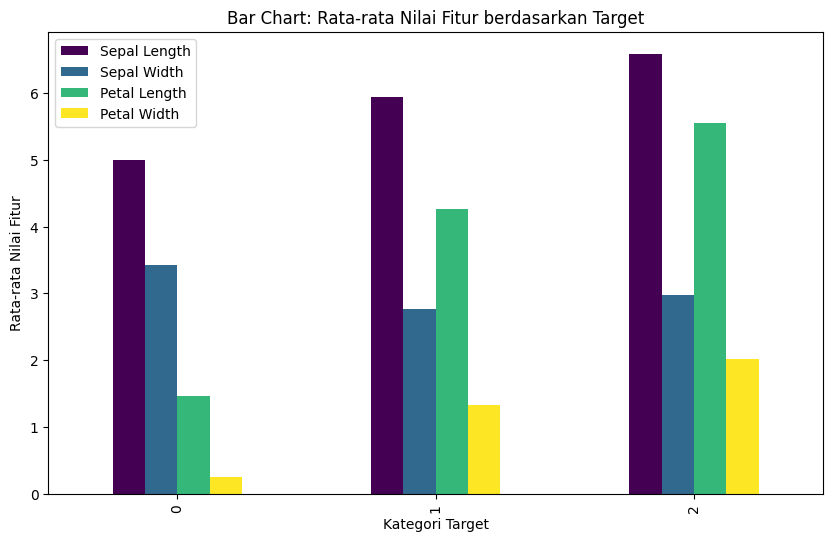

In [26]:
 # Bar Chart untuk nilai rata-rata setiap fitur berdasarkan target
mean_values = df.groupby('target').mean()
bar_chart = mean_values.plot(kind='bar', figsize=(10, 6), colormap='viridis')
bar_chart.set_ylabel('Rata-rata Nilai Fitur')
bar_chart.set_xlabel('Kategori Target')
bar_chart.set_title('Bar Chart: Rata-rata Nilai Fitur berdasarkan Target')
plt.show()

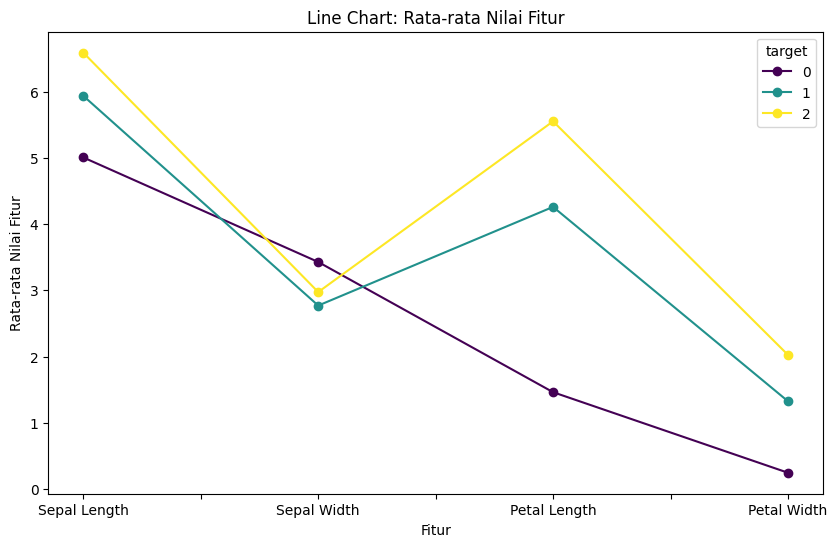

In [27]:
# Line Chart untuk nilai rata-rata setiap fitur
line_chart = mean_values.T.plot(kind='line', marker='o', figsize=(10, 6), colormap='viridis')
line_chart.set_ylabel('Rata-rata Nilai Fitur')
line_chart.set_xlabel('Fitur')
line_chart.set_title('Line Chart: Rata-rata Nilai Fitur')
plt.show()

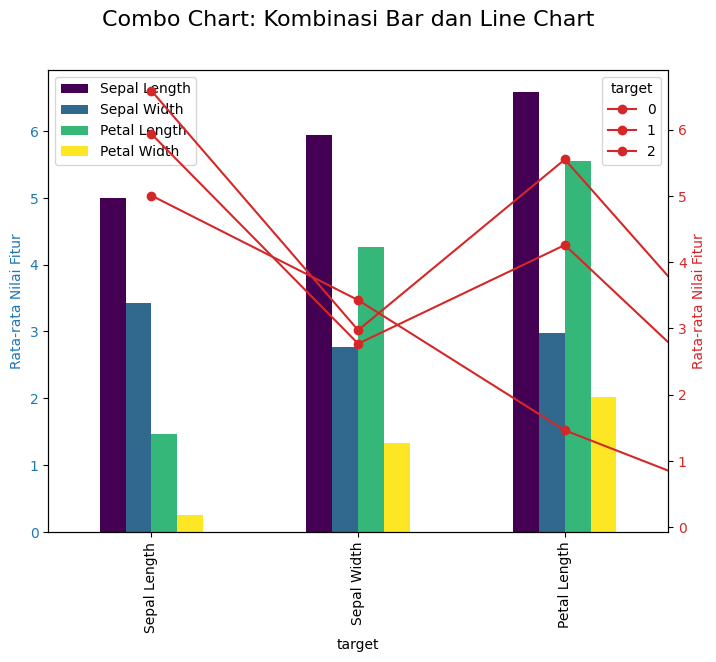

In [29]:
 # Combo Chart: Kombinasi Bar dan Line Chart
fig, ax1 = plt.subplots(figsize=(8, 6))

# Bar Chart pada sumbu kiri
color = 'tab:blue'
ax1.set_xlabel('Kategori Target')
ax1.set_ylabel('Rata-rata Nilai Fitur', color=color)
bar_chart_combo = mean_values.plot(kind='bar', ax=ax1, colormap='viridis')
ax1.tick_params(axis='y', labelcolor=color)

# Line Chart pada sumbu kanan
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Rata-rata Nilai Fitur', color=color)
line_chart_combo = mean_values.T.plot(kind='line', marker='o', ax=ax2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Judul dan tampilan grafik
fig.suptitle('Combo Chart: Kombinasi Bar dan Line Chart', fontsize=16)
plt.show()

2. Komposisi (Composition)

- Pie Chart
    - Deskripsi: Pie chart menggambarkan data dalam bentuk lingkaran yang terbagi menjadi sejumlah “potongan” (slices) yang mewakili proporsi relatif dari keseluruhan.
    - Penggunaan: Cocok untuk menunjukkan perbandingan proporsi atau persentase dari satu keseluruhan. Contohnya, pangsa pasar dari beberapa produk.

- Stacked Bar Chart
    - Deskripsi: Stacked bar chart menunjukkan data dalam bentuk batang vertikal atau horizontal yang bertumpuk, dengan setiap tumpukan mewakili kategori atau sub-kategori.
    - Penggunaan: Berguna untuk menunjukkan kontribusi masing-masing bagian terhadap keseluruhan. Contohnya, penjualan bulanan per produk yang dibagi berdasarkan wilayah.

- Treemap
    - Deskripsi: Treemap menggambarkan data hierarkis dalam bentuk kotak-kotak yang berukuran berdasarkan nilai atau ukuran masing-masing kategori.
    - Penggunaan: Ideal untuk menunjukkan struktur hierarki dan membandingkan proporsi relatif di dalamnya. Misalnya, pengeluaran anggaran departemen dalam sebuah perusahaan.

- Waterfall Chart
    - Deskripsi: Waterfall chart digunakan untuk mengilustrasikan perubahan kumulatif dari suatu nilai, dengan batang yang naik atau turun mewakili kontribusi positif atau negatif.
    - Penggunaan: Berguna untuk melihat kontribusi sepanjang suatu proses atau mengidentifikasi faktor-faktor yang mempengaruhi perubahan nilai. Contohnya, perubahan laba bersih dari satu periode ke periode berikutnya.

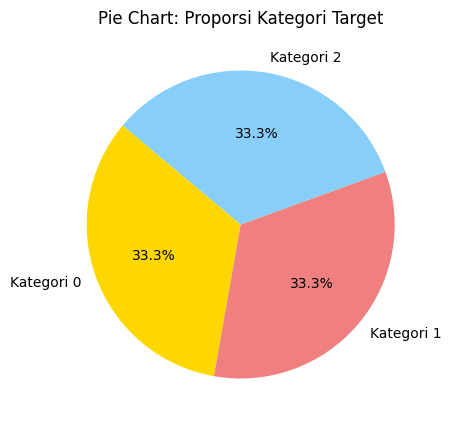

In [35]:
 # Pie Chart untuk proporsi kategori target
target_counts = df['target'].value_counts()
labels = [f'Kategori {i}' for i in target_counts.index]
colors = ['gold', 'lightcoral', 'lightskyblue']

plt.figure(figsize=(5, 5))
plt.pie(target_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart: Proporsi Kategori Target')
plt.show()

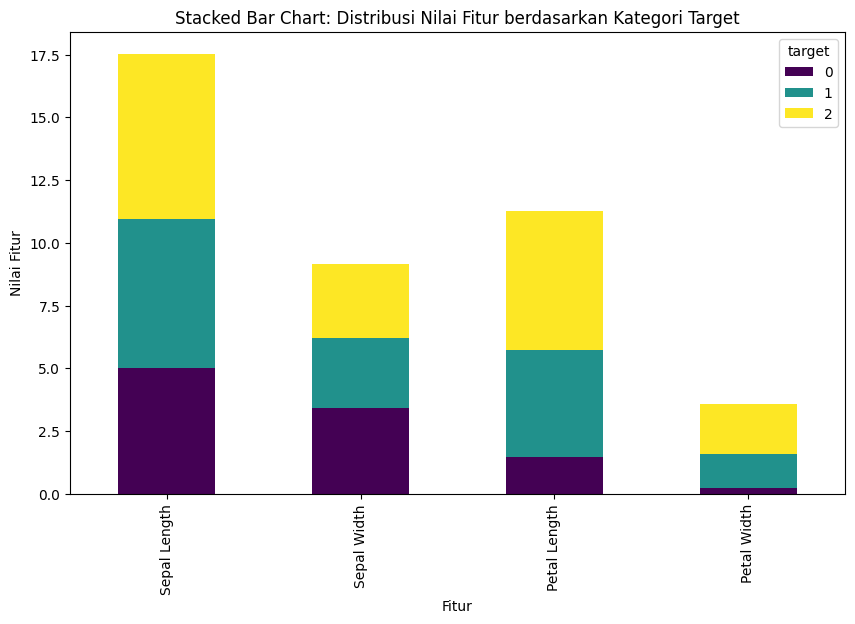

In [37]:
# Stacked Bar Chart untuk distribusi nilai fitur berdasarkan kategori target
stacked_bar_chart = df.groupby('target').mean().T.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
stacked_bar_chart.set_ylabel('Nilai Fitur')
stacked_bar_chart.set_xlabel('Fitur')
stacked_bar_chart.set_title('Stacked Bar Chart: Distribusi Nilai Fitur berdasarkan Kategori Target')
plt.show()

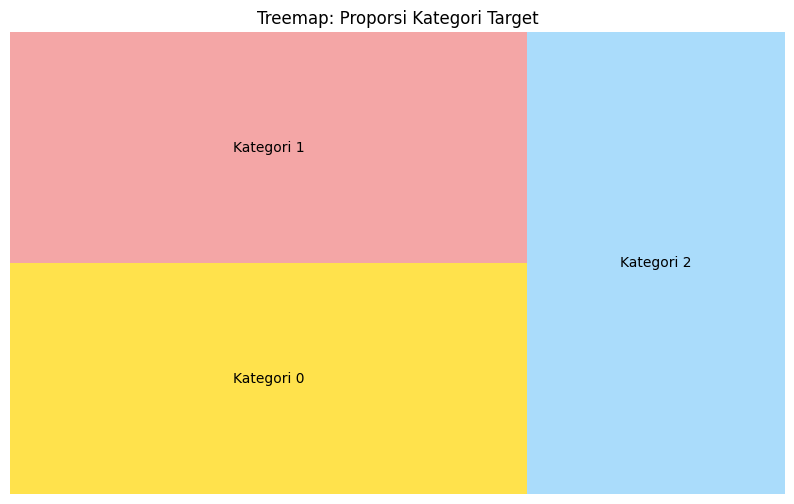

In [38]:
# Treemap untuk proporsi kategori target
plt.figure(figsize=(10, 6))
squarify.plot(sizes=target_counts, label=labels, color=colors, alpha=0.7)
plt.title('Treemap: Proporsi Kategori Target')
plt.axis('off')
plt.show()

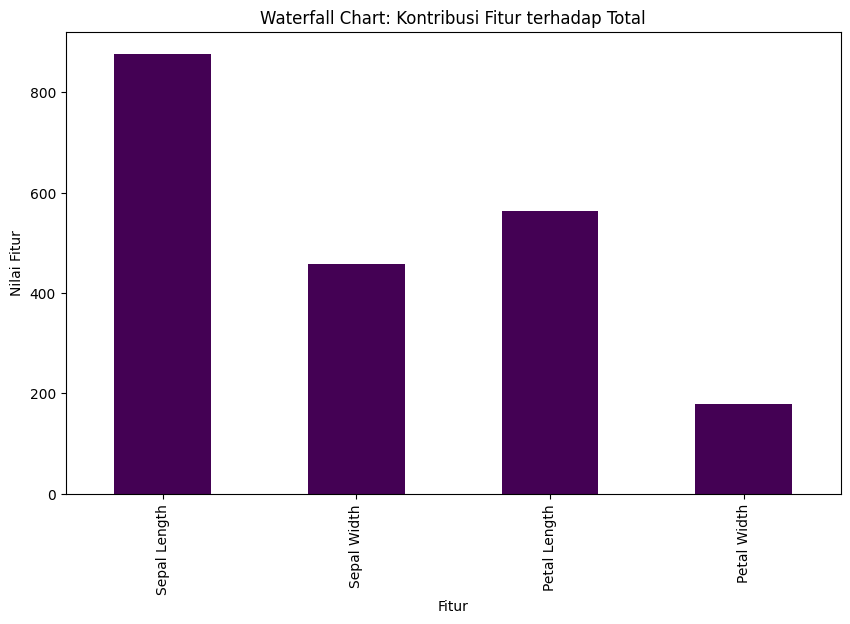

In [39]:
 # Waterfall Chart untuk melihat kontribusi setiap fitur terhadap total
waterfall_data = df.drop('target', axis=1).sum()
waterfall_chart = waterfall_data.plot(kind='bar', figsize=(10, 6), colormap='viridis')
waterfall_chart.set_ylabel('Nilai Fitur')
waterfall_chart.set_xlabel('Fitur')
waterfall_chart.set_title('Waterfall Chart: Kontribusi Fitur terhadap Total')
plt.show()

3. Distribusi (Distribution)

- Histogram
    - Deskripsi: Histogram adalah grafik batang yang menunjukkan distribusi frekuensi dari suatu data numerik. Batang-batang tersebut mewakili rentang nilai dan tingginya sesuai dengan frekuensinya.
    - Penggunaan: Cocok untuk menunjukkan distribusi dan pola data. Biasanya digunakan untuk melihat apakah data memiliki kecenderungan tertentu, seperti distribusi normal atau skewness.
- Box Plot

    - Deskripsi: Box plot menggambarkan statistik ringkasan seperti kuartil, median, dan rentang dalam bentuk diagram. Garis di dalam kotak mewakili median, dan batas kotak menunjukkan kuartil pertama (Q1) dan kuartil ketiga (Q3).
    - Penggunaan: Berguna untuk melihat distribusi dan variabilitas data. Box plot membantu mengidentifikasi pencilan (outliers) dan memberikan gambaran ringkas tentang statistik deskriptif.
- Violin Plot

    - Deskripsi: Violin plot adalah kombinasi antara box plot dan kernel density plot. Ini menunjukkan distribusi data dengan cara yang mirip dengan histogram, tetapi dalam bentuk lebih halus.
    - Penggunaan: Ideal untuk melihat distribusi dan kepadatan data. Violin plot dapat memberikan informasi lebih rinci tentang bentuk distribusi, serta menunjukkan kepadatan pada berbagai nilai.

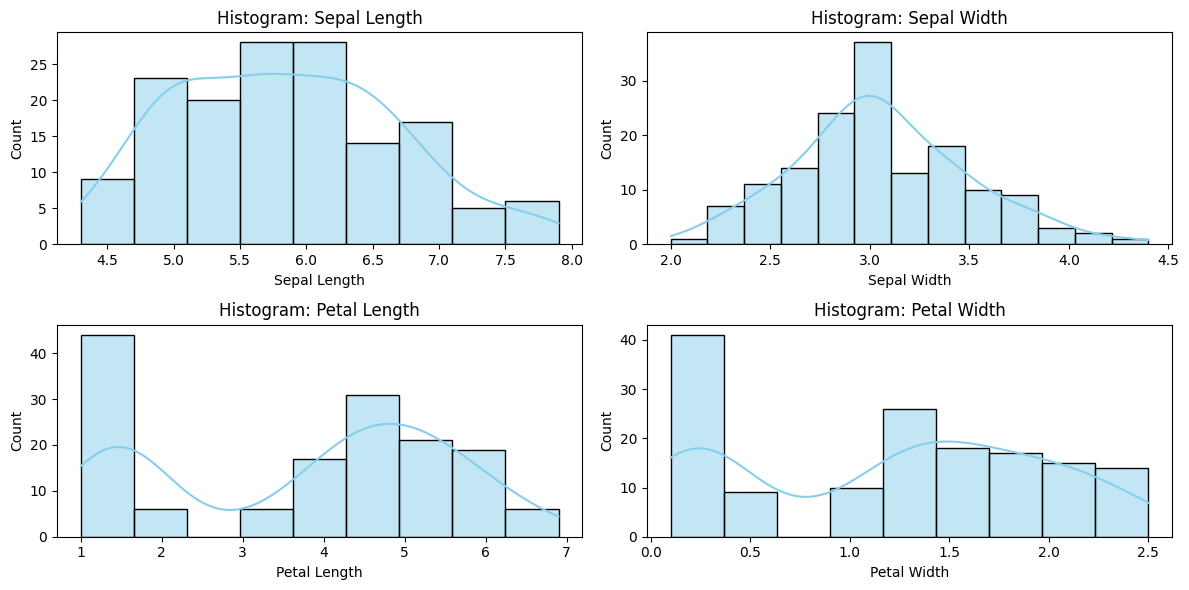

In [41]:
 # Histogram untuk distribusi nilai fitur
plt.figure(figsize=(12, 6))
for i, feature in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[feature], kde=True, color='skyblue')
    plt.title(f'Histogram: {feature}')

plt.tight_layout()
plt.show()

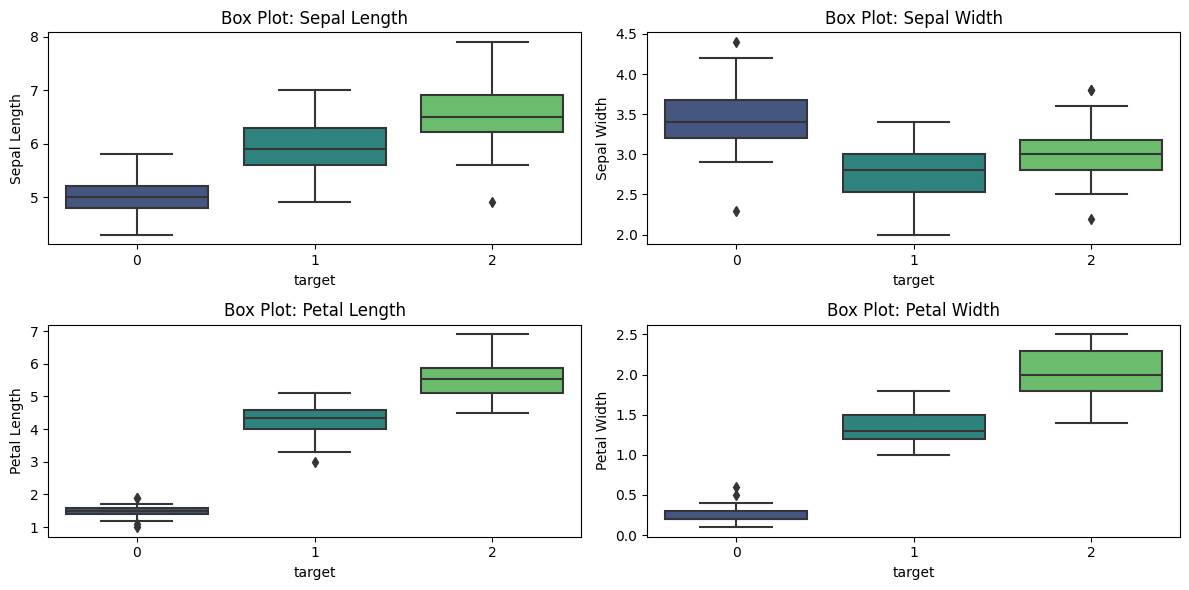

In [43]:
 # Box Plot untuk melihat distribusi dan outlier
plt.figure(figsize=(12, 6))
for i, feature in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='target', y=feature, data=df, palette='viridis')
    plt.title(f'Box Plot: {feature}')

plt.tight_layout()
plt.show()

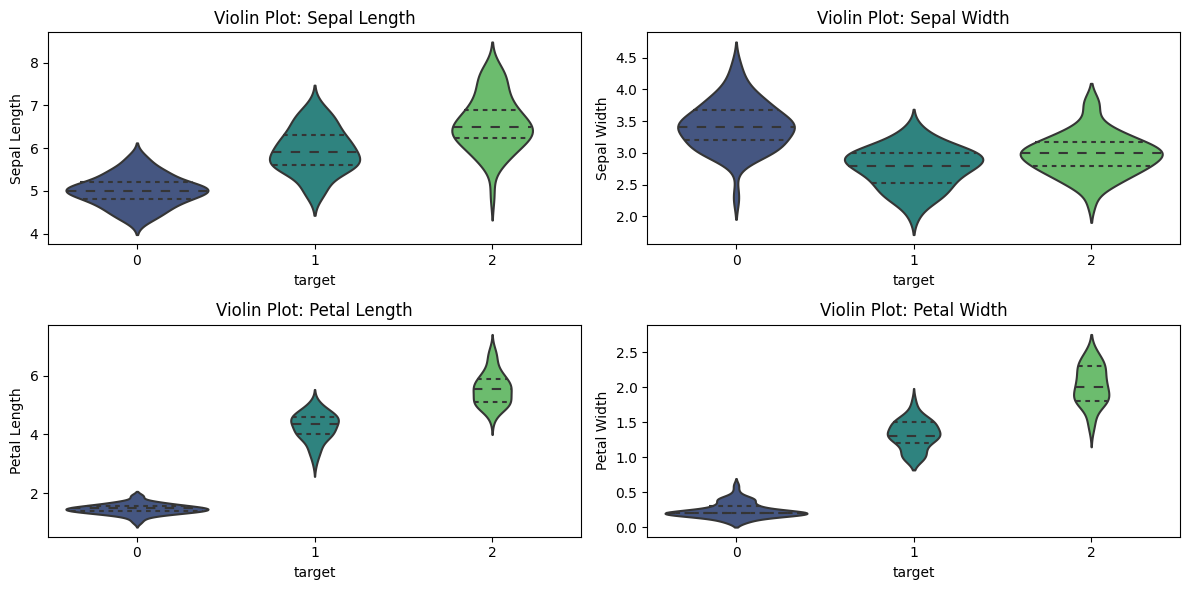

In [44]:
# Violin Plot untuk kombinasi histogram dan kernel density estimate (KDE)
plt.figure(figsize=(12, 6))
for i, feature in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.violinplot(x='target', y=feature, data=df, palette='viridis', inner='quartile')
    plt.title(f'Violin Plot: {feature}')

plt.tight_layout()
plt.show()

4. Hubungan (Relationship)

- Scatter Plot
    - Deskripsi: Scatter plot menunjukkan hubungan antara dua variabel numerik dengan menempatkan titik-titik pada bidang kartesian. Setiap titik mewakili satu pengamatan atau data point.
    - Penggunaan: Cocok untuk menemukan pola atau hubungan antara dua variabel. Misalnya, hubungan antara waktu studi dan nilai ujian.

- Bubble Chart
    - Deskripsi: Sama seperti scatter plot, tetapi dengan tambahan dimensi ketiga yang direpresentasikan oleh ukuran gelembung (bubble). Ukuran gelembung mencerminkan nilai dari variabel ketiga.
    - Penggunaan: Berguna untuk menunjukkan hubungan tiga variabel sekaligus. Contohnya, scatter plot yang menunjukkan hubungan antara waktu studi dan nilai ujian, dengan ukuran gelembung mencerminkan jumlah jam belajar.

- Heatmap
    - Deskripsi: Heatmap adalah representasi visual dari data dalam bentuk matriks di mana warna mewakili nilai masing-masing sel. Digunakan terutama untuk menunjukkan pola dalam data besar.
    - Penggunaan: Cocok untuk menemukan pola atau relasi dalam data matriks. Misalnya, heatmap dapat digunakan untuk menunjukkan korelasi antara berbagai variabel atau untuk visualisasi data spasial.

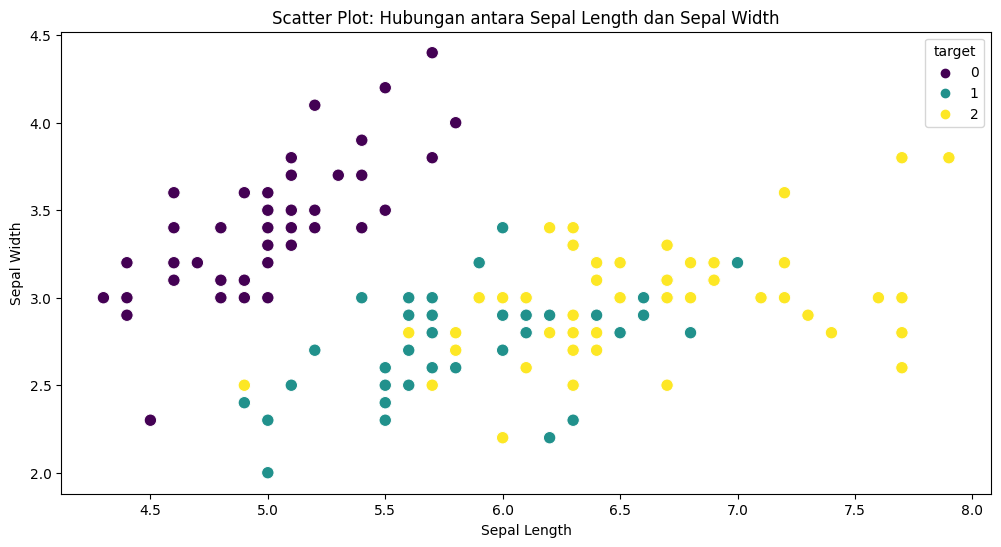

In [46]:
 # Scatter Plot untuk melihat hubungan antara dua fitur
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Sepal Length', y='Sepal Width', hue='target', data=df, palette='viridis', s=80)
plt.title('Scatter Plot: Hubungan antara Sepal Length dan Sepal Width')
plt.show()

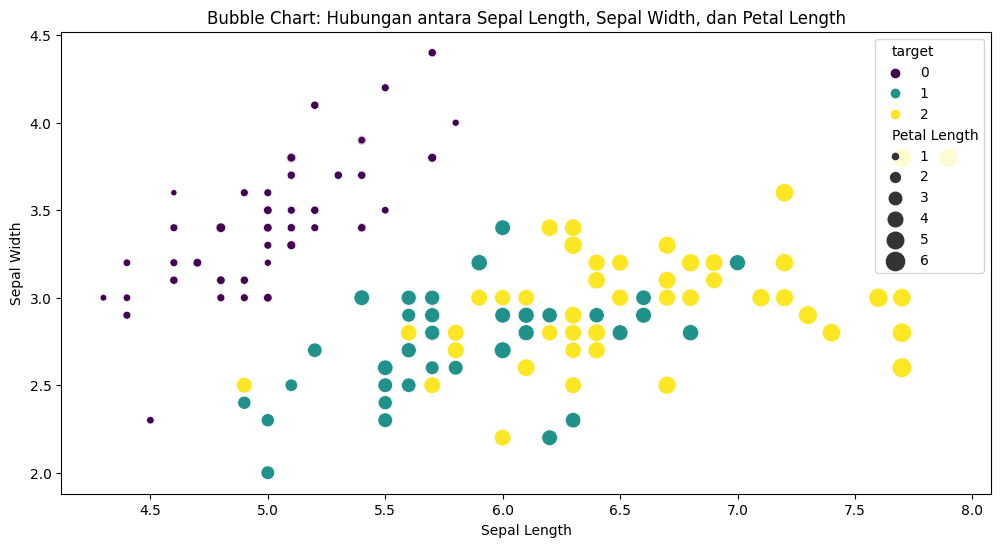

In [47]:
 # Bubble Chart untuk menambah dimensi ketiga (ukuran marker) pada scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Sepal Length', y='Sepal Width', hue='target', size='Petal Length', sizes=(20, 200), data=df, palette='viridis')
plt.title('Bubble Chart: Hubungan antara Sepal Length, Sepal Width, dan Petal Length')
plt.show()

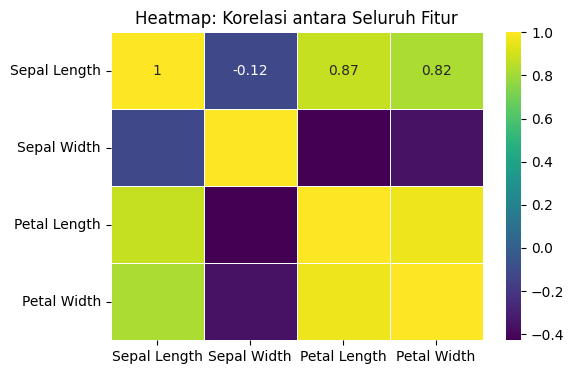

In [48]:
# Heatmap untuk melihat korelasi antara seluruh fitur
correlation_matrix = df.drop('target', axis=1).corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=.5)
plt.title('Heatmap: Korelasi antara Seluruh Fitur')
plt.show()